# Análise Exploratória de Dados sobre Perda de Comida

A perda e o desperdício de alimentos são problemas globais que afetam tanto a segurança alimentar quanto o meio ambiente.
Estima-se que uma parte significativa da produção mundial de comida nunca chegue ao consumo humano, resultando em:

- Impactos econômicos (custos de produção e distribuição desperdiçados);
- Impactos sociais (menos disponibilidade de alimentos para populações vulneráveis);
- Impactos ambientais (emissão de gases de efeito estufa, uso desnecessário de água e solo).

Neste notebook, iremos realizar uma **Análise Exploratória de Dados (EDA)** a partir do arquivo:

**`food_wastage.csv`**

O objetivo é identificar padrões, correlações e insights sobre **como, onde e quanto alimento é perdido ou desperdiçado**, fornecendo subsídios para futuras soluções e estratégias de mitigação.

---


## Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Lendo a base de dados `food_wastage.csv`

In [3]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('food_wastage.csv')

## Primeiras impressões da base de dados

In [4]:
display(data.head())

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


### Mudando nome das colunas para facilitar o processo de codificação

In [5]:
data = data.rename(columns={
    'Type of Food': "food_type",
    'Number of Guests': "guests_num",
    'Event Type': "event_type",
    'Quantity of Food': "food_quantity_kg",
    'Storage Conditions': "storage_conditions",
    'Purchase History': "purchase_history",
    'Seasonality': "seasonality",
    'Preparation Method': "preparation_method",
    'Geographical Location': "geo_location",
    'Pricing': "pricing",
    'Wastage Food Amount': "wastage_food_amount_kg"
})

## Verificando a mudança de nomes das colunas

In [6]:
display(data.head(1))

,food_type,guests_num,event_type,food_quantity_kg,storage_conditions,purchase_history,seasonality,preparation_method,geo_location,pricing,wastage_food_amount_kg
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25


In [7]:
data.shape

(1782, 11)

#### A base possui **1782 Linhas** e **11 Colunas**.

## Verificando se há valores nulos

In [8]:
print(data.isnull().sum())

food_type                 0
guests_num                0
event_type                0
food_quantity_kg          0
storage_conditions        0
purchase_history          0
seasonality               0
preparation_method        0
geo_location              0
pricing                   0
wastage_food_amount_kg    0
dtype: int64


## Conhecendo colunas
### Verificando variações de cada coluna

In [9]:
for col in data.columns:
    print(f"{col} - {data[col].unique()}\n")

food_type - ['Meat' 'Vegetables' 'Fruits' 'Baked Goods' 'Dairy Products']

guests_num - [310 400 302 491 300 240 320 250 267 350 380 220 208 280 438 439 434 290
 450 230 442 397 261 342 275 472 367 292 488 247 207 453 260 412 270 284
 430 429 432]

event_type - ['Corporate' 'Birthday' 'Wedding' 'Social Gathering']

food_quantity_kg - [450 500 371 497 400 350 393 300 282 493 459 495 374 480 482 405 388 489
 420 470 498 348 280 484 452 478 443 477 496 354]

storage_conditions - ['Refrigerated' 'Room Temperature']

purchase_history - ['Regular' 'Occasional']

seasonality - ['All Seasons' 'Winter' 'Summer']

preparation_method - ['Buffet' 'Finger Food' 'Sit-down Dinner']

geo_location - ['Urban' 'Suburban' 'Rural']

pricing - ['Low' 'High' 'Moderate']

wastage_food_amount_kg - [25 40 27 32 20 45 35 10 24 30 15 22 50 39 36 31 23 29 16 63 54 33 38 26
 42 34]



## A coluna `food_type` parece interessante!
### Vamos ver a relação dela com a coluna `wastage_food_amount_kg` para ver a quantidade de comida perdida por tipo

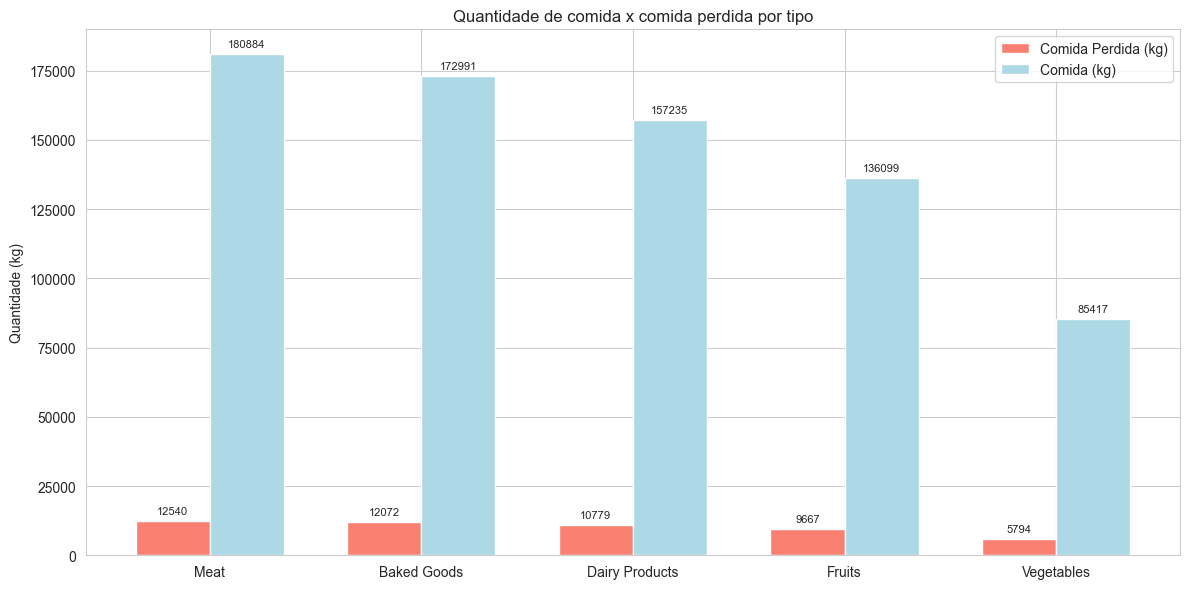

In [11]:
grouped = data.groupby('food_type').agg(
    total_wastage_kg=('wastage_food_amount_kg', 'sum'),
    total_food_kg=('food_quantity_kg', 'sum')
)

grouped = grouped.sort_values(by='total_food_kg', ascending=False)

food_types = grouped.index.to_list()
wasted = grouped['total_wastage_kg'].values
total = grouped['total_food_kg'].values


x = np.arange(len(food_types))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, wasted, width, label='Comida Perdida (kg)', color='salmon')
plt.bar(x + width/2, total, width, label='Comida (kg)', color='lightblue')

# anotação com deslocamento proporcional ao maior valor
offset = max(total.max(), wasted.max()) * 0.01
for i in range(len(x)):
    plt.text(x[i] - width/2, wasted[i] + offset, f'{wasted[i]:.0f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, total[i] + offset, f'{total[i]:.0f}', ha='center', va='bottom', fontsize=8)

plt.xticks(x, food_types, rotation=0)
plt.ylabel('Quantidade (kg)')
plt.title('Quantidade de comida x comida perdida por tipo')
plt.legend()
plt.tight_layout()
plt.show()




### Agora, vamos ver a proporção de comida perdida por tipo

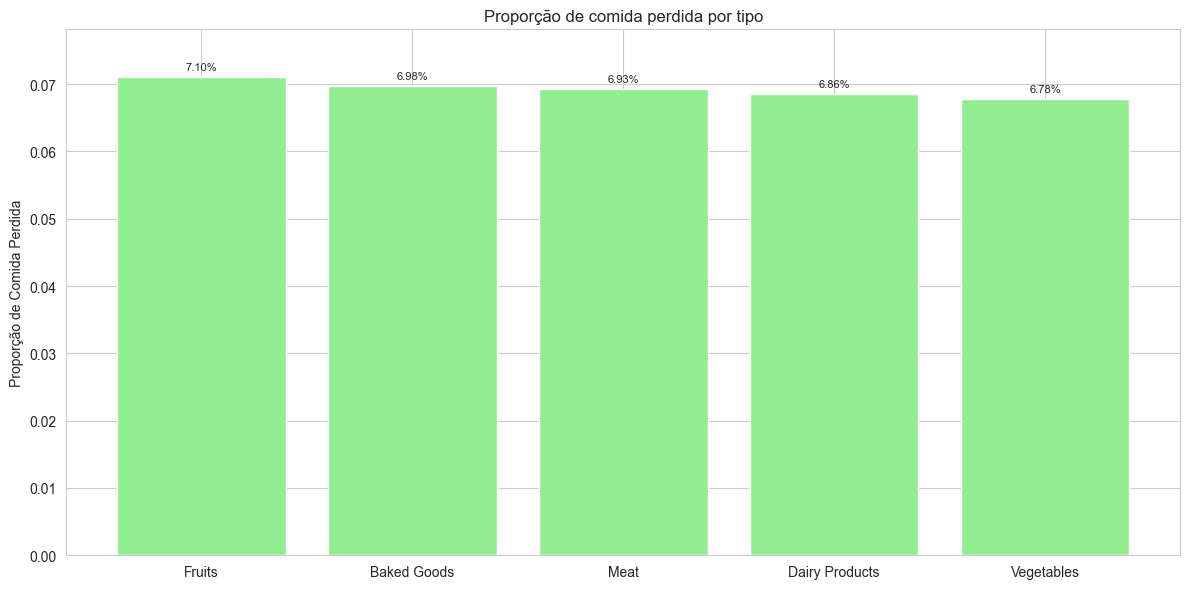

In [12]:
grouped['wastage_proportion'] = grouped['total_wastage_kg'] / grouped['total_food_kg']
grouped = grouped.sort_values(by='wastage_proportion', ascending=False)

food_types = grouped.index.to_list()
proportions = grouped['wastage_proportion'].values

x = np.arange(len(food_types))
plt.figure(figsize=(12,6))
bars = plt.bar(x, proportions, color='lightgreen')
offset = max(proportions) * 0.01
for i in range(len(x)):
    plt.text(x[i], proportions[i] + offset, f'{proportions[i]:.2%}', ha='center', va='bottom', fontsize=8)
plt.xticks(x, food_types, rotation=0)
plt.ylabel('Proporção de Comida Perdida')
plt.title('Proporção de comida perdida por tipo')
plt.ylim(0, max(proportions) * 1.1)
plt.tight_layout()
plt.show()

## Concluímos que, proporcionalmente, as frutas são o tipo de comida que mais se perde.

<ol>
    <li> Fruits
    <li> Baked Goods
    <li> Meat
    <li> Dairy Products
    <li> Vegetbles

## Vamos ver a relação entre o tipo de evento e a quantidade de comida perdida

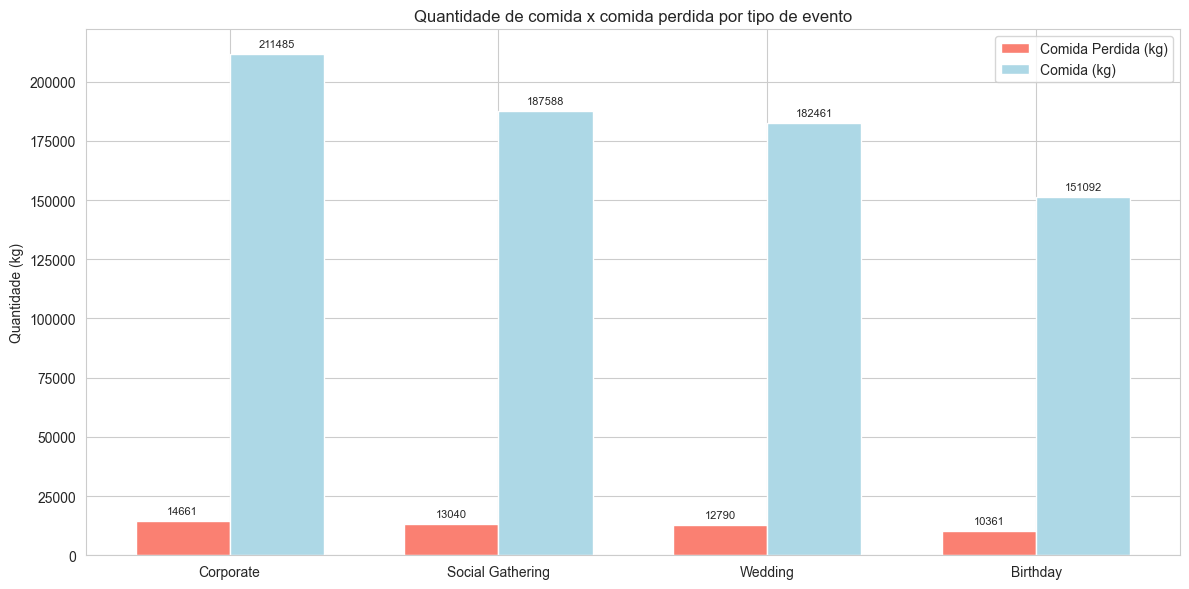

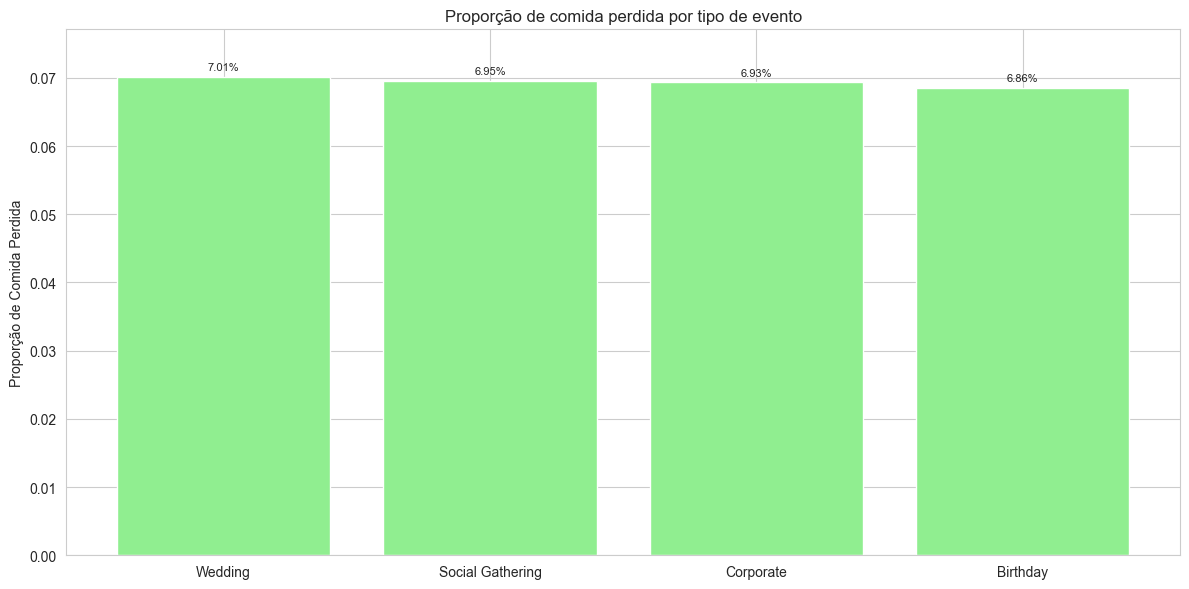

In [17]:
grouped = data.groupby('event_type').agg(
    total_wastage_kg=('wastage_food_amount_kg', 'sum'),
    total_food_kg=('food_quantity_kg', 'sum')
)

grouped = grouped.sort_values(by='total_food_kg', ascending=False)

event_types = grouped.index.to_list()
wasted = grouped['total_wastage_kg'].values
total = grouped['total_food_kg'].values


x = np.arange(len(event_types))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, wasted, width, label='Comida Perdida (kg)', color='salmon')
plt.bar(x + width/2, total, width, label='Comida (kg)', color='lightblue')

# anotação com deslocamento proporcional ao maior valor
offset = max(total.max(), wasted.max()) * 0.01
for i in range(len(x)):
    plt.text(x[i] - width/2, wasted[i] + offset, f'{wasted[i]:.0f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, total[i] + offset, f'{total[i]:.0f}', ha='center', va='bottom', fontsize=8)

    plt.xticks(x, event_types, rotation=0)
plt.ylabel('Quantidade (kg)')
plt.title('Quantidade de comida x comida perdida por tipo de evento')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------

grouped['wastage_proportion'] = grouped['total_wastage_kg'] / grouped['total_food_kg']
grouped = grouped.sort_values(by='wastage_proportion', ascending=False)

event_types = grouped.index.to_list()
proportions = grouped['wastage_proportion'].values

x = np.arange(len(event_types))
plt.figure(figsize=(12, 6))
bars = plt.bar(x, proportions, color='lightgreen')
offset = max(proportions) * 0.01
for i in range(len(x)):
    plt.text(x[i], proportions[i] + offset, f'{proportions[i]:.2%}', ha='center', va='bottom', fontsize=8)
plt.xticks(x, event_types, rotation=0)
plt.ylabel('Proporção de Comida Perdida')
plt.title('Proporção de comida perdida por tipo de evento')
plt.ylim(0, max(proportions) * 1.1)
plt.tight_layout()
plt.show()




## Concluímos que, proporcionalmente, os eventos do tipo **Wedding** são os que mais perdem comida.
<ol>
    <li> Wedding
    <li> Social Gathering
    <li> Corporate
    <li> Birthday